<a href="https://colab.research.google.com/github/deepshah1300/DL/blob/main/J077_exp1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

from numpy.random import seed
import tensorflow as tf

seed(42)
tf.random.set_seed(42)

In [7]:
!wget http://upscfever.com/datasets/csvTrainImages13440x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTrainLabel13440x1.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestImages3360x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestLabel3360x1.csv -P drive/app

--2021-01-25 05:35:59--  http://upscfever.com/datasets/csvTrainImages13440x1024.csv
Resolving upscfever.com (upscfever.com)... 172.67.193.2, 104.21.90.10, 2606:4700:3033::6815:5a0a, ...
Connecting to upscfever.com (upscfever.com)|172.67.193.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/csvTrainImages13440x1024.csv [following]
--2021-01-25 05:36:00--  https://upscfever.com/datasets/csvTrainImages13440x1024.csv
Connecting to upscfever.com (upscfever.com)|172.67.193.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘drive/app/csvTrainImages13440x1024.csv’

csvTrainImages13440     [           <=>      ]  28.22M  10.3MB/s    in 2.7s    

2021-01-25 05:36:04 (10.3 MB/s) - ‘drive/app/csvTrainImages13440x1024.csv’ saved [29593405]

--2021-01-25 05:36:04--  http://upscfever.com/datasets/csvTrainLabel13440x1.csv
Resolving upscfever.com (upscfever.com)... 172.67

In [8]:
train_data = pd.read_csv('drive/app/csvTrainImages13440x1024.csv', header = None)
train_label = pd.read_csv('drive/app/csvTrainLabel13440x1.csv', header = None)
test_data = pd.read_csv('drive/app/csvTestImages3360x1024.csv', header = None)
test_label = pd.read_csv('drive/app/csvTestLabel3360x1.csv', header = None)

In [9]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
print("train_data:",train_data.shape)
print("train_label:",train_label.shape)
print("test_data:",test_data.shape)
print("test_label:",test_label.shape)

train_data: (13440, 1024)
train_label: (13440, 1)
test_data: (3360, 1024)
test_label: (3360, 1)


In [11]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

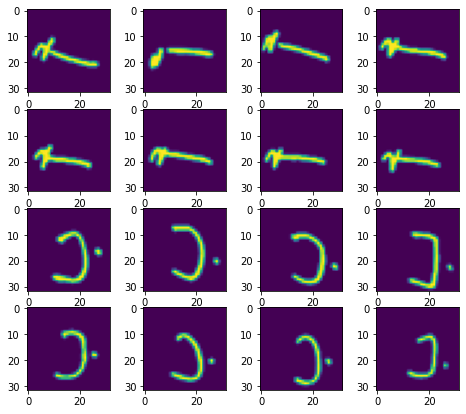

In [12]:
display_image(train_data, 32, 16)

In [13]:

from keras.utils import to_categorical
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

train_data = train_data/255
test_data = test_data/255


train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])
print("train_data:",train_data.shape)
print("test_data",test_data.shape)

train_data: (13440, 32, 32, 1)
test_data (3360, 32, 32, 1)


In [14]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        validation_split=0.2)

train_generator = datagen.flow(x=train_data,y=train_label,subset='training',seed=42,batch_size=100) # set as training data
validation_generator = datagen.flow(x=train_data,y=train_label,subset='validation',seed=42,batch_size=100)
datagen.fit(train_data)

In [15]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
from keras import models
from keras import layers

from keras.models import Input, Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU

cnn = Sequential()
cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (32,32,1)))
cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
cnn.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(units = 218, input_dim = 1024, activation = 'relu'))
cnn.add(Dense(units = 218, activation = "relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(28, activation = "softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [16]:
cnn.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="best.hdf5",save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.003,patience=15,mode='max',restore_best_weights=True)
from tqdm.keras import TqdmCallback
history=cnn.fit(train_generator,validation_data = validation_generator,epochs=50,verbose=0,steps_per_epoch = train_data.shape[0]*0.8//100,validation_steps = train_data.shape[0]*0.2//100,callbacks=[model_checkpoint_callback, TqdmCallback(verbose=1),es])

In [17]:
dev_acc=cnn.evaluate(test_data,test_label)

105/105 [==============================] - 1s 3ms/step - loss: 0.1427 - accuracy: 0.9732


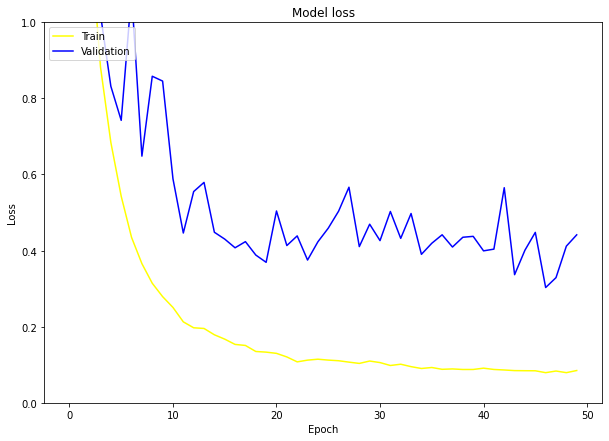

In [18]:
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
cnn.save('final_model')

INFO:tensorflow:Assets written to: final_model/assets


In [20]:
from tensorflow import keras
model = keras.models.load_model('final_model')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
##FLower Recognition

In [21]:
!wget http://upscfever.com/datasets/flowers-new.zip -P drive/app
import os
os.chdir('drive/app')  #change dir
!unzip -q flowers-new.zip  #unzip data in test/

--2021-01-25 05:40:13--  http://upscfever.com/datasets/flowers-new.zip
Resolving upscfever.com (upscfever.com)... 104.21.90.10, 172.67.193.2, 2606:4700:3033::ac43:c102, ...
Connecting to upscfever.com (upscfever.com)|104.21.90.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/flowers-new.zip [following]
--2021-01-25 05:40:14--  https://upscfever.com/datasets/flowers-new.zip
Connecting to upscfever.com (upscfever.com)|104.21.90.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘drive/app/flowers-new.zip’

flowers-new.zip         [         <=>        ]   5.74M  2.22MB/s    in 2.6s    

2021-01-25 05:40:17 (2.22 MB/s) - ‘drive/app/flowers-new.zip’ saved [6021364]



In [39]:
 def gen_data(flower):
  label = flower
  path = '/content/drive/app/flowers/' + flower
  img_list = os.listdir(path)
  for img in img_list:
    img = cv2.imread(path + '/' + img)
    img = img.reshape((1,) + img.shape) 

    augment = ImageDataGenerator(rescale = 1./255, zoom_range = 0.1, 
                             height_shift_range = 0.1, shear_range = 5, rotation_range = 5,
                             horizontal_flip = True)

    i = 0
    for batch in augment.flow(img, batch_size = 1, save_to_dir = path + '/', save_prefix = 'gen', 
                        save_format = 'jpeg'):
      i = i+1
      if i == 10: break

In [40]:
import cv2

X = []
Y = []
def compile_data(flower):
  label = flower
  path = '/content/drive/app/flowers/' + flower
  img_list = os.listdir(path)
  for img in img_list:
    img = cv2.imread(path + '/' + img)
    img = cv2.resize(img, (256, 256))
    X.append(img)
    Y.append(label)

In [41]:
gen_data('daisy')
gen_data('dandelion')
gen_data('rose')
gen_data('sunflower')
gen_data('tulip')
compile_data('daisy')
compile_data('dandelion')
compile_data('rose')
compile_data('sunflower')
compile_data('tulip')

In [42]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
Y=le.fit_transform(Y)
Y=to_categorical(Y)
X=np.array(X)
X = np.reshape(X, (len(X), 256*256*3))
X=X/255


In [43]:
from sklearn.model_selection import train_test_split

X = np.reshape(X, (np.shape(X)[0], 256, 256, 3))

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:

cnn = Sequential()
cnn.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (256,256,3)))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

cnn.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

cnn.add(Flatten())
cnn.add(Dense(218, activation = 'relu'))
cnn.add(Dense(5, activation = 'softmax'))

In [45]:
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="best.hdf5",save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta = 0.05, patience = 10, mode = 'max', restore_best_weights = True)
history = cnn.fit(x_train, y_train, epochs = 100, validation_split = 0.20, callbacks = [es,model_checkpoint_callback])

Epoch 1/100
26/26 [==============================] - 4s 99ms/step - loss: 3.8795 - accuracy: 0.3194 - val_loss: 1.1353 - val_accuracy: 0.5294
Epoch 2/100
26/26 [==============================] - 2s 76ms/step - loss: 0.8265 - accuracy: 0.6884 - val_loss: 0.7646 - val_accuracy: 0.6520
Epoch 3/100
26/26 [==============================] - 2s 77ms/step - loss: 0.5103 - accuracy: 0.8150 - val_loss: 0.5871 - val_accuracy: 0.7696
Epoch 4/100
26/26 [==============================] - 2s 76ms/step - loss: 0.2427 - accuracy: 0.9219 - val_loss: 0.3543 - val_accuracy: 0.8873
Epoch 5/100
26/26 [==============================] - 2s 77ms/step - loss: 0.0738 - accuracy: 0.9782 - val_loss: 0.3435 - val_accuracy: 0.8480
Epoch 6/100
26/26 [==============================] - 2s 76ms/step - loss: 0.0754 - accuracy: 0.9803 - val_loss: 0.3689 - val_accuracy: 0.8725
Epoch 7/100
26/26 [==============================] - 2s 76ms/step - loss: 0.0356 - accuracy: 0.9905 - val_loss: 0.3532 - val_accuracy: 0.9020
Epoch 

In [46]:
cnn.evaluate(x_test, y_test)

8/8 [==============================] - 0s 49ms/step - loss: 0.3386 - accuracy: 0.8980


[0.33863934874534607, 0.8980392217636108]

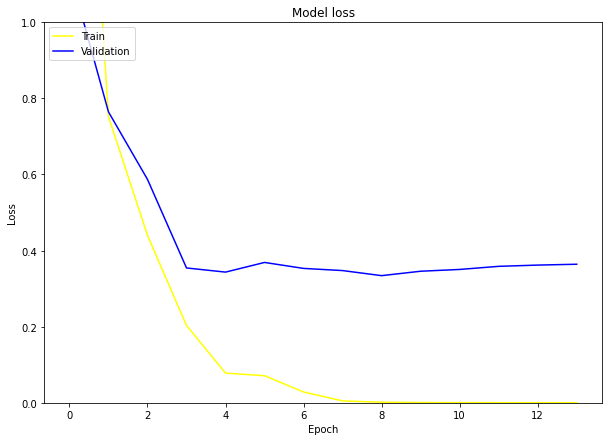

In [47]:
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [48]:
model.save('final_model2')

INFO:tensorflow:Assets written to: final_model2/assets


In [49]:
model = keras.models.load_model('final_model2')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0